 # Task 1
 ### <b> Webscraping and Analysis </b>


##### Author: Stella
---

## Project Overvew 

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.


#### Project Objectives

- Scrape the reviews that are associated with British Airways from SkyTrax. 
- Conduct a sentiment analysis based on the scraped data.
- Provide insights to the company based on the sentiments raised.

### Data Understanding 
If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. 

In the dataset, we has 3500 rows and 2 columns : The two columns in the dataframe included `reviews` and `date` .
This gave us information regarding the customer reviews and the date in which they posted their review on the website. 


# Data Science Process

The data science process that was used was based on the CRISP-DM process. 




In [1]:
# Import all the necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import vader
from collections import Counter
from wordcloud import WordCloud
import datetime
from nltk import ngrams
from nltk.probability import FreqDist
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []
date = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for review in parsed_content.find_all("article", {"itemprop": "review"}):
        # Extract review text
        review_text = review.find("div", {"class": "text_content"}).get_text()
        reviews.append(review_text)

        # Extract date
        try:
            review_date = review.find("div", {"class": "body"}).find("time").get_text()
        except AttributeError:
            review_date = "N/A"
        date.append(review_date)

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame({"reviews":reviews, "date":date})
df.head()

,reviews,date
0,✅ Trip Verified | The airline lost my luggage...,25th June 2023
1,✅ Trip Verified | We booked on the BA website...,25th June 2023
2,✅ Trip Verified | First time flying with BA b...,25th June 2023
3,Not Verified | You can buy sandwiches and cris...,24th June 2023
4,✅ Trip Verified | This is a two-for-one revie...,24th June 2023


In [4]:
cwd = os.getcwd()
df.to_csv(cwd + "/data/BA_reviews.csv") # Saves the dataframe as a csv file in the data folder.

In [5]:
# Inspect index 0

df['reviews'].get(0)

'✅ Trip Verified |  The airline lost my luggage and was absolutely awful throughout the entire trip. They gave me no updates, their website sucks, and it was nearly impossible to get someone on the phone. They finally delivered my luggage to my hotel after i had left to go back to the US, 5 days after I told them to ship it back to the US. Now, I’ve been calling everyday begging them to get my bag back to me. They appease me on the phone, tell me they’re fixing it, but nothing changes. The hotel can’t get in touch with them and they haven’t even tried to pick to bag back up. Several times, when I called I got a message saying they were not answering due to too many complaints and calls and to “call back later”. '

#### <b> Clean the dataset </b>

In [6]:
len(df['reviews']) # checks the length of the column "reviews"

3500

In [7]:
# Creates a new column that extracts the information on whether the trip is verified or not

df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified'].value_counts(normalize=True) # Checks the percentage value of the content in this new column.


False    0.695143
True     0.304857
Name: verified, dtype: float64

In [8]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")  
corpus =[]
# Instantiate the WordNetLemmatizer

lemma = WordNetLemmatizer()

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [9]:
# add the corpus to the original dataframe

df['corpus'] = corpus
df

,reviews,date,verified,corpus
0,✅ Trip Verified | The airline lost my luggage...,25th June 2023,True,airline lost luggage absolutely awful througho...
1,✅ Trip Verified | We booked on the BA website...,25th June 2023,True,booked ba website round trip flight seattle am...
2,✅ Trip Verified | First time flying with BA b...,25th June 2023,True,first time flying ba business class never boar...
3,Not Verified | You can buy sandwiches and cris...,24th June 2023,False,verified buy sandwich crisp expect hot meal pl...
4,✅ Trip Verified | This is a two-for-one revie...,24th June 2023,True,two one review covering economy business class...
...,...,...,...,...
3495,Travelling from Venice to London Gatwick with ...,9th June 2014,False,avelling venice london gatwick british airway ...
3496,LHR-VIE on an A319. Online check-in didn't sta...,9th June 2014,False,lhr vie online check start working hour flight...
3497,LHR-SIN in Business on B-747. Hard to find muc...,8th June 2014,False,lhr sin business b hard find much good say exp...
3498,LHR to BOS. Day after baggage shut down but Fi...,8th June 2014,False,lhr bos day baggage shut first check easy secu...


In [10]:
#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)

df.head(8)

,reviews,date,verified,corpus
0,The airline lost my luggage and was absolutely...,25th June 2023,True,airline lost luggage absolutely awful througho...
1,"We booked on the BA website, round trip flight...",25th June 2023,True,booked ba website round trip flight seattle am...
2,"First time flying with BA business class, neve...",25th June 2023,True,first time flying ba business class never boar...
3,Not Verified | You can buy sandwiches and cris...,24th June 2023,False,verified buy sandwich crisp expect hot meal pl...
4,This is a two-for-one review covering economy ...,24th June 2023,True,two one review covering economy business class...
5,Absolutely horrible airline. Communication is ...,23rd June 2023,True,absolutely horrible airline communication terr...
6,Having experienced delays and cancellations de...,22nd June 2023,True,experienced delay cancellation departing usa e...
7,Travelled to Heathrow to Kalamata and return j...,20th June 2023,True,avelled heathrow kalamata return journey day l...


In [11]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

df.head()

,reviews,date,verified,corpus
0,The airline lost my luggage and was absolutely...,2023-06-25,True,airline lost luggage absolutely awful througho...
1,"We booked on the BA website, round trip flight...",2023-06-25,True,booked ba website round trip flight seattle am...
2,"First time flying with BA business class, neve...",2023-06-25,True,first time flying ba business class never boar...
3,Not Verified | You can buy sandwiches and cris...,2023-06-24,False,verified buy sandwich crisp expect hot meal pl...
4,This is a two-for-one review covering economy ...,2023-06-24,True,two one review covering economy business class...


In [12]:
df.isna().sum()

reviews     0
date        0
verified    0
corpus      0
dtype: int64

In [13]:
# Cleaned data 
cwd = os.getcwd()
df.to_csv( cwd + "/data/BA_reviews_cleaned.csv")

## <b> EDA </b>

In [14]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'sentiment'
df['sentiment'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

,reviews,date,verified,corpus,sentiment
0,The airline lost my luggage and was absolutely...,2023-06-25,True,airline lost luggage absolutely awful througho...,-0.7990
1,"We booked on the BA website, round trip flight...",2023-06-25,True,booked ba website round trip flight seattle am...,0.7184
2,"First time flying with BA business class, neve...",2023-06-25,True,first time flying ba business class never boar...,-0.7096
3,Not Verified | You can buy sandwiches and cris...,2023-06-24,False,verified buy sandwich crisp expect hot meal pl...,-0.5849
4,This is a two-for-one review covering economy ...,2023-06-24,True,two one review covering economy business class...,0.9657
...,...,...,...,...,...
3495,Travelling from Venice to London Gatwick with ...,2014-06-09,False,avelling venice london gatwick british airway ...,-0.9357
3496,LHR-VIE on an A319. Online check-in didn't sta...,2014-06-09,False,lhr vie online check start working hour flight...,-0.9030
3497,LHR-SIN in Business on B-747. Hard to find muc...,2014-06-08,False,lhr sin business b hard find much good say exp...,-0.8710
3498,LHR to BOS. Day after baggage shut down but Fi...,2014-06-08,False,lhr bos day baggage shut first check easy secu...,0.9855


In [15]:
# Creating another new column called 'sentiment_type' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df['sentiment_type'] = df['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df #inspect the dataframe

,reviews,date,verified,corpus,sentiment,sentiment_type
0,The airline lost my luggage and was absolutely...,2023-06-25,True,airline lost luggage absolutely awful througho...,-0.7990,negative
1,"We booked on the BA website, round trip flight...",2023-06-25,True,booked ba website round trip flight seattle am...,0.7184,positive
2,"First time flying with BA business class, neve...",2023-06-25,True,first time flying ba business class never boar...,-0.7096,negative
3,Not Verified | You can buy sandwiches and cris...,2023-06-24,False,verified buy sandwich crisp expect hot meal pl...,-0.5849,negative
4,This is a two-for-one review covering economy ...,2023-06-24,True,two one review covering economy business class...,0.9657,positive
...,...,...,...,...,...,...
3495,Travelling from Venice to London Gatwick with ...,2014-06-09,False,avelling venice london gatwick british airway ...,-0.9357,negative
3496,LHR-VIE on an A319. Online check-in didn't sta...,2014-06-09,False,lhr vie online check start working hour flight...,-0.9030,negative
3497,LHR-SIN in Business on B-747. Hard to find muc...,2014-06-08,False,lhr sin business b hard find much good say exp...,-0.8710,negative
3498,LHR to BOS. Day after baggage shut down but Fi...,2014-06-08,False,lhr bos day baggage shut first check easy secu...,0.9855,positive


In [16]:
# calculate the percentage of each type of sentiment score
sent_type_percentages = df['sentiment_type'].value_counts(normalize=True)
sent_type_percentages

positive    0.589714
negative    0.407714
neutral     0.002571
Name: sentiment_type, dtype: float64

/var/folders/y4/pmym6p_d39x52p2813gxh2m40000gn/T/ipykernel_81464/282992437.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(


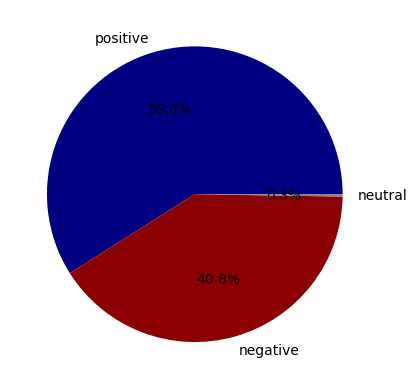

In [17]:
# Plot the sentiment percentages 

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sent_type_percentages,
    labels=sent_type_percentages.index, 
    colors=['navy', 'darkred', 'grey'], 
    autopct='%1.1f%%'
    )

plt.show()

Out of the 3500 reviews collected we can note the following:

1. 59 % had positive sentiments expressed towards British Airways 

2. 41 % had negative sentiments towards the company.

3. Only 0.3 % had a neutral sentiment expressed 


It is therefore of our importance to understand why the 41% expressed negative sentiments towards British Airways.


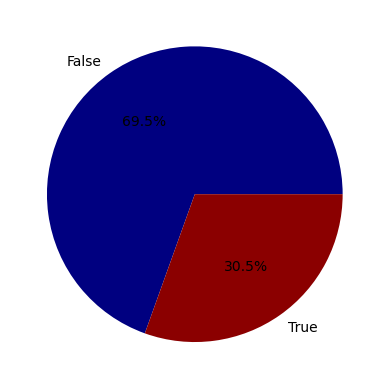

In [18]:
# Plot the verified reviews 
verified_pctg = df['verified'].value_counts(normalize=True)

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    verified_pctg,
    labels=verified_pctg.index, 
    colors=['navy', 'darkred'], 
    autopct='%1.1f%%'
    )

plt.show()

In [19]:
# Save the new data into a csv file in the data folder
cwd = os.getcwd()

df.to_csv( cwd + "/data/sentiment_analysis_data.csv")

In [20]:
# make a frequency chart that will tell us the key topics that are mentioned in the reviews

reviews = df['corpus']

# Convert the reviews into a list of words 

words = []
for review in reviews:
    words.extend(review.split())
    

# Filter out the remaining stopwords

stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]


In [21]:
# Get the top 20 most used words 
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out any of the remaining stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]


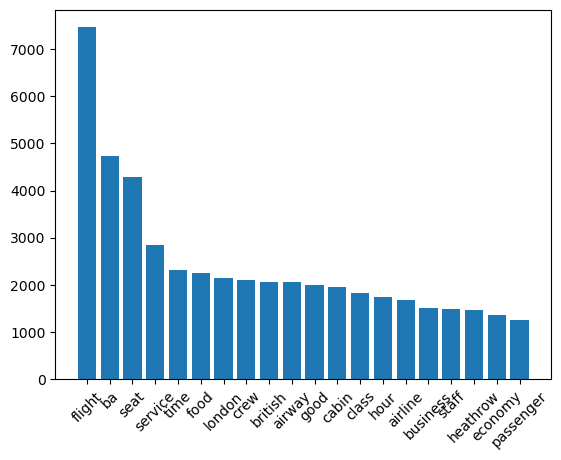

In [22]:
# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=45)

#Display the plot
plt.show()


#### Key topics 

We can tell from this bar plot that the key words/topics that have been discussed in the reviews has to do with:

        - Flight
        - BA (British Airways)
        - Seat 
        - Service
        - Time & Food

This gives us information on the topics most customers are reviewing whether it is positive or negative.

## Time series analysis

In [23]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date')
fig.show()

<b> Interpretation:</b>

Based on this Time Series chart we can tell that the number of reviews have significantly declined; this may be attributed to the reduction of people travelling due to the COVID-19 global pandemic, and as the world has shifted into the post-covid era, there may still be some people that are not yet comfortable with travelling.

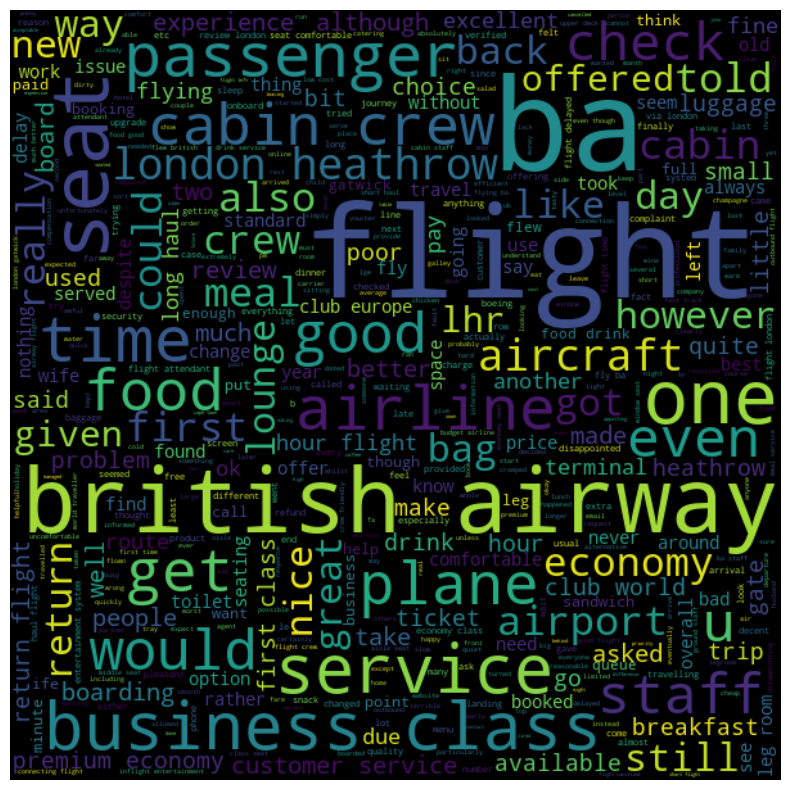

In [24]:
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

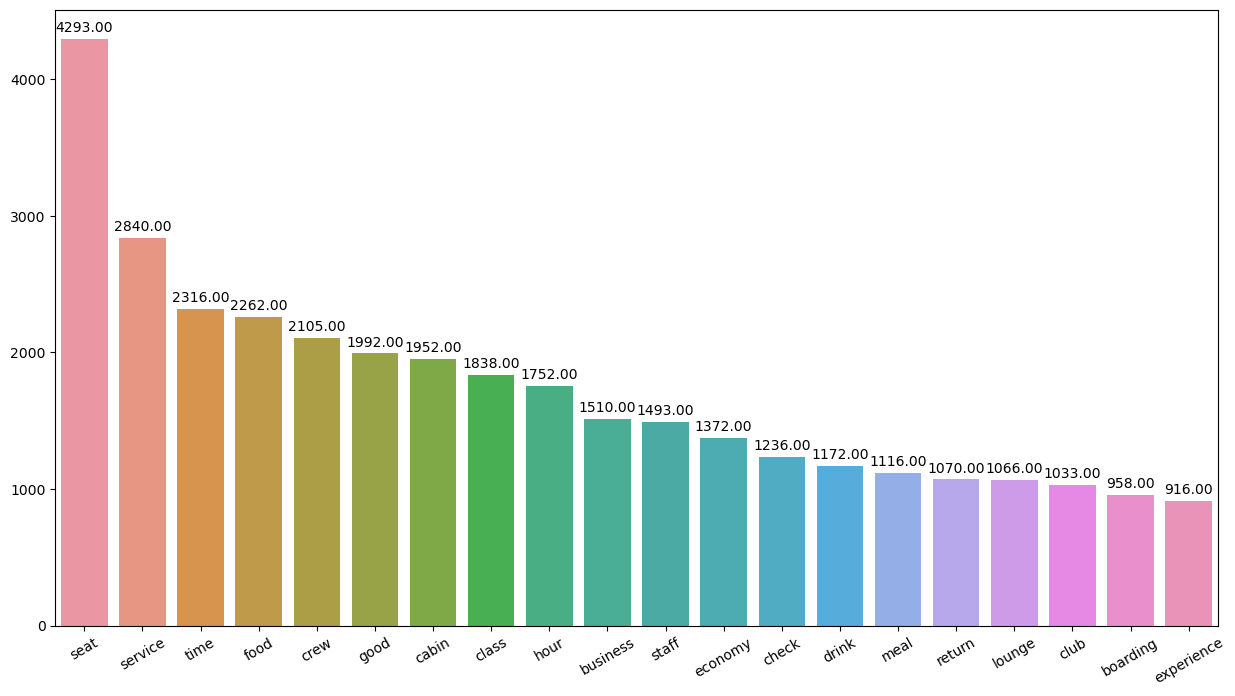

In [26]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)

# Add labels to the bars
for container in all_plot.containers:
    for rect in container:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=30)

# Display the plot
plt.show()

<b> Interpretation:</b>

This chart helps us in understanding what the customers are actually talking about, a bit more specifically. 
We can tell based on the first 5 words : `seat`, `service`, `time`, `food` and `crew` that these are important things to air passengers in terms of the services provided by the airline.


In the next section we will explore whether or not their sentiments expressed about the following are positive or negative. 

### <b> Word Frequency using N-gram </b>

<AxesSubplot:>

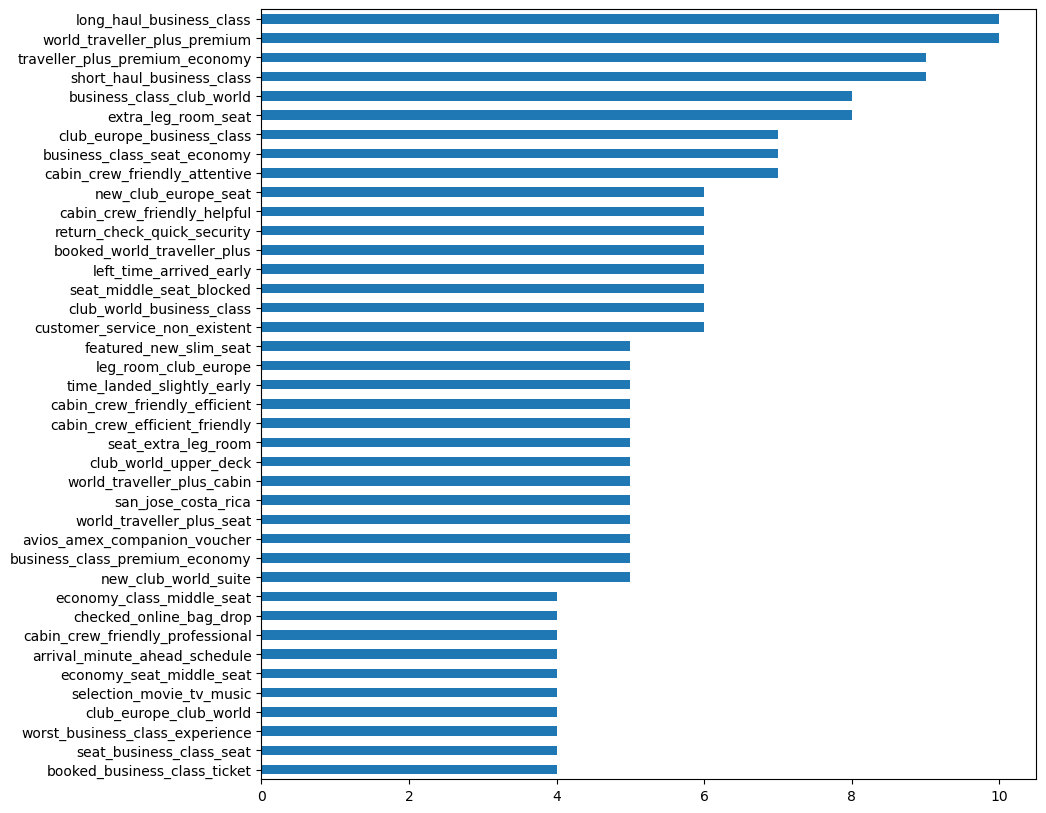

In [27]:
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax

get_freq_dist(new_words, 4)


<b> Interpretation : </b>

Based on this word frequency chart we can note that there are some positive sentiments that are expressed for example:

        - cabin_crew_friendly_efficient
        - cabin_crew_friendly_helpful
        - cabin_crew_friendly_attentive

Therefore, customers are expressing positive reviews towards the cabin crew.

However, it is worth noting a particular negative review was given that might be of interest to the company :

        - customer_service_non_existent
        - worst_business_class_experience 



Another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library. 

This is an NLTK module that provides sentiment scores based on the words used.

In [28]:
%%capture
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0


In [29]:
df.label.value_counts()


 1    2257
-1    1123
 0     120
Name: label, dtype: int64

### Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word matrices. For this purpose we will use count vectorizer method from the sklearn library.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


In [31]:
# Create an object of CountVectorizer
vect = CountVectorizer()

# Convert the corpus to a list of strings (if not already)
corpus = df.corpus.tolist()

# Apply transformation
tf = vect.fit_transform(corpus)
tf_array = tf.toarray()

# Get the feature names
tf_feature_names = vect.get_feature_names_out() 

In [32]:

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic = pd.DataFrame(topic_dict)

In [33]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,ba,55.6,pillow,9.2,seat,779.1,seat,208.0,flight,2854.8,passenger,157.6,flight,2883.6,ba,1564.9
1,flight,36.0,wir,7.1,flight,515.7,service,150.0,ba,1412.1,seat,130.3,good,1660.0,seat,1545.5
2,staff,33.6,prawn,6.2,meal,508.9,economy,145.0,hour,917.5,ba,95.8,seat,1468.8,class,1206.7
3,great,30.1,und,6.1,cabin,314.1,flight,144.2,time,667.1,one,89.0,crew,1435.0,business,1036.2
4,heathrow,29.5,thai,4.4,food,308.2,ba,144.1,london,656.6,flight,75.2,ba,1275.3,flight,948.3
5,travel,25.6,ck,4.1,drink,285.1,cabin,132.0,service,635.6,boarding,73.0,food,1248.9,airline,908.3
6,first,25.1,coca,4.1,one,282.6,leg,110.2,airway,633.2,check,70.3,cabin,1124.6,airway,737.3
7,child,25.0,cola,4.1,hour,266.5,crew,96.9,british,628.6,staff,66.6,service,1091.6,british,731.0
8,class,24.5,flower,4.1,british,258.3,time,81.1,would,602.9,bag,66.5,time,1080.2,service,700.5
9,london,24.1,smoked,4.0,airway,252.1,return,79.9,check,599.7,crew,52.3,lounge,837.9,london,609.1


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

These words are too general to give us any information.

### Topic modeling with NMF

In [34]:
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03831941, 0.00919234],
       [0.17771306, 0.01010003],
       [0.02088267, 0.05423595],
       ...,
       [0.11081101, 0.05968707],
       [0.03137714, 0.02902175],
       [0.07036567, 0.03156633]])

In [35]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [36]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,36.1,seat,16.1
1,ba,12.1,ba,8.6
2,hour,8.0,class,7.0
3,time,6.9,food,5.6
4,london,6.2,business,5.5
5,service,6.0,service,5.4
6,airway,5.8,cabin,5.2
7,british,5.7,good,4.8
8,would,5.2,crew,4.7
9,airline,4.5,economy,4.3
